<a href="https://colab.research.google.com/github/ChuLinh02/GraphMining/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC17103 - Colab 3 - Các mô hình tạo sinh mạng lưới (Tiếp)**

Đây là Bài tập 03 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

(Cập nhật lần cuối: 21/07/2024)

Họ tên: Chu Hải Linh

MSSV: 21120496

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW03.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [18]:
# Upgrade packages
# !pip install --upgrade scipy networkx

In [19]:
# Import
import random
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
import scipy.stats as st
from scipy.stats import ks_2samp
plt.style.use("fast")

from typing import Tuple, Dict

%matplotlib inline

In [20]:
# Make sure something
assert nx.__version__ > '2.5'

## Task 01: Độ dài đường đi trung bình trong mô hình Watts-Strogatz

Trong bài tập trước, chúng ta đã tìm hiểu mô hình Watts-Strogatz, một mô hình thế giới nhỏ — kết nối lại một cạnh có xác suất `p` trong mạng vòng với các `n` đỉnh và bậc `k`.

Bây giờ ta sẽ kiểm tra thử trung bình độ dài đường đi có xu hướng tiến đến giá trị như thế nào trong quá trình hình thành một mô hình thế giới nhỏ (small-world).

$$\langle L \rangle = \begin{cases}
N/2k, \quad\text{ nếu } p \to 0 \\
\log(N)/\log(k), \quad\text{ nếu } p \to 1
\end{cases}$$

Như công thức trên, ta có một giới hạn trên và giới hạn dưới của độ dài đường đi với $0 < p < 1$.

Nhiệm vụ của các bạn là hoàn thành hàm `smallworldPathLength` với các tham số của mô hình Watts-Strogatz `n, k, p` mà trả cề độ dài trung bình đường đi trong mỗi bước. Chiều dài của mảng là `n`.

*Gợi ý: tính toán trung bình đường đi ngắn nhất bằng cách sử dụng `nx.average_shortest_path_length`*

In [21]:
def ringLattice(n: int, k: int) -> nx.Graph:
    """Hàm tạo đồ thị vòng.

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Create a ring lattice
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Connect each node to its k nearest neighbors in a circular manner
    for node in range(n):
      for neighbor_offset in range(1, k//2 + 1):  # Connect to k/2 neighbors each side
        # Add "right-side" neighbor
        right_neighbor = (node + neighbor_offset) % n
        G.add_edge(node, right_neighbor)

        # Add "left-side" neighbor
        left_neighbor = (node - neighbor_offset) % n
        G.add_edge(node, left_neighbor)

    return G

In [22]:
def rewire(G: nx.Graph, node: int, k: int, p: float) -> nx.Graph:
    """Hàm rewire để nối lại một cạnh (node, i) thành một cạnh (node, j) ngẫu nhiên với xác suất cho trước.

    Parameters
    ----------
    G
        (nx.Graph) đồ thị đầu vào
    node
        (int) input node
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Total number of nodes in the graph
    n = G.number_of_nodes()

    # Iterate over the "right-side" neighbors
    for neighbor_offset in range(1, k // 2 + 1):
      # Calculate the original neighbor on the right side
      original_neighbor = (node + neighbor_offset) % n

      # Decide whether to rewire this edge
      r = random.random()
      if (r <= p):
        # Randomly select a new neighbor
        new_neighbor = random.choice(list(G.nodes))
        while new_neighbor == node or new_neighbor == original_neighbor or G.has_edge(node, new_neighbor):
          new_neighbor = random.choice(list(G.nodes))
        # Rewire: remove the original edge and add new edge
        G.remove_edge(node, original_neighbor)
        G.add_edge(node, new_neighbor)

    return G

In [23]:
def smallworldPathLength(n: int, k: int, p: float) -> np.ndarray:
    # YOUR CODE HERE
    G = ringLattice(n, k)
    avg_path_lengths = []
    for node in G.nodes:
        G = rewire(G, node, k, p)
        if nx.is_connected(G):
            avg_length = nx.average_shortest_path_length(G)
        else:
            avg_length = float('inf')

        avg_path_lengths.append(avg_length)

    return np.array(avg_path_lengths)


In [24]:
# Test 1
n, k, p = 50, 8, 0.1
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

In [25]:
# Test 2
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

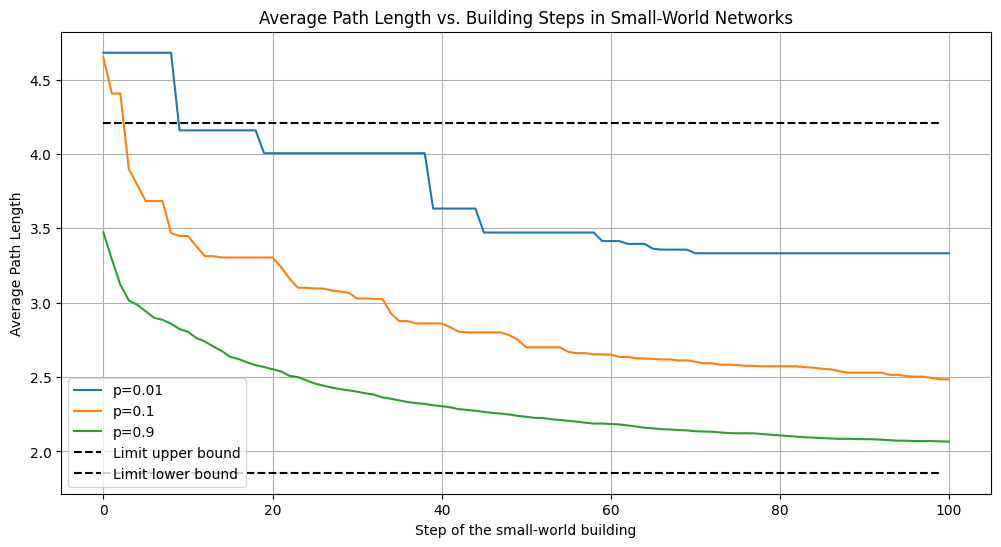

In [26]:
def plotSmallworldPathLengths():
    plt.figure(figsize=(12, 6))

    # Parameters for the small-world network
    params = [(0.01, 'p=0.01'), (0.1, 'p=0.1'), (0.9, 'p=0.9')]

    for p, label in params:
        n, k = 101, 12
        lengths = smallworldPathLength(n, k, p)
        plt.plot(lengths, label=label)

    # Plot the theoretical bounds
    n, k = 101, 12
    upper_bound = n / 2 / k
    lower_bound = np.log(n) / np.log(k)

    plt.plot([0, 99], [upper_bound, upper_bound],
             'k--', label='Limit upper bound')
    plt.plot([0, 99], [lower_bound, lower_bound],
             'k--', label='Limit lower bound')

    plt.xlabel('Step of the small-world building')
    plt.ylabel('Average Path Length')
    plt.title('Average Path Length vs. Building Steps in Small-World Networks')
    plt.grid(True)
    plt.legend(loc='lower left')

    plt.show()


plotSmallworldPathLengths()

Bạn có nhận xét gì?

YOUR ANSWER HERE

## Task 02: Phân phối bậc trong mô hình Barabási–Albert

Cũng trong bài tập trước, các bạn đã được giới thiệu qua mô hình sinh Barabási–Albert hay còn gọi là preferential attachment model. Mô hình này là quá trình quá triển mà trong đó mỗi đỉnh mới liên kết đến `m` đỉnh đang tồn tại. Bậc đỉnh càng cao, xác suất liên kết càng cao. Cuối cùng, số lượng đỉnh trong đồ thị là `n`. Đồ thị Barabási–Albert có phân phối bậc như sau:

$$P(k) = \frac{2m^2}{k^3}$$

Dễ thấy, đây là luật lũy thừa (Power law) vói $\alpha = 3$ và $k_{\min} = m$


Trong phần này, chúng ta sẽ kiểm tra phát biểu trên bằng thực nghiệm! Bằng cách phát sinh một tập các đồ thị Barabási–Albert và ước lượng các tham số của luật lũy thừa bằng Maximum likelihood estimation (MLE).

$$\alpha = 1 + n \left[\sum_i \log \frac{k_i}{k_{\min}} \right]^{-1}$$

trong đó $k_{\min}$ được lựa chọn bằng cách cực tiểu [khoảng cách Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) giữa phân phối quan trắc (observed distributions) và phân phối lý thuyết (theoretical distributions).


Trước tiên, bạn hoàn thành một hàm `powerLawPDF` mà nhận các tham số của phân phối luật lũy thừa và trả về CDF.

In [31]:
def powerLawPDF(x: int, alpha: float = 3.5, x_min: int = 1):
    # YOUR CODE HERE
    if x_min < 1:
      raise  ValueError("x_min phải lớn hơn hoặc bằng 1")
    x = np.array(x)
    pdf = np.where(
        x >= x_min,
        1 - (x_min / x) ** (alpha - 1),
        0
    )

    return pdf

In [32]:
# Test
assert powerLawPDF(2, 2, 1) == 0.5
assert powerLawPDF(10, 2, 1) == 0.9

Tiếp theo, bạn hoàn thành hàm `mlePowerLawParams` mà nhận đầu vào là một dãy bậc và trả về một tuple: the best $\alpha$, the best $k_{\min}$ tương ứng với MLE.

_Gợi ý: sử dụng `scipy.stats.kstest` trong đó một CDF lý thuyết là một hàm `powerLawPDF` và `args=(alpha, k_min)`_

In [40]:
def mlePowerLawParams(degree_sequence: np.ndarray) -> Tuple[Dict, Dict]:
    # YOUR CODE HERE
    unique_degrees = np.unique(degree_sequence)
    best_params = {"alpha": None, "k_min": None}
    ks_results = {"ks_stat": float('inf'), "alpha": None, "k_min": None}
    for k in unique_degrees:
      data = degree_sequence[degree_sequence >= k]
      alpha_hat = 1 + len(data) / np.sum(np.log(data / k))
      ks_distance = st.kstest(np.sort(data), lambda x: powerLawPDF(x, alpha_hat, k))

      if ks_distance.statistic < ks_results["ks_stat"]:
        ks_results["ks_stat"] = ks_distance.statistic
        ks_results["alpha"] = alpha_hat
        ks_results["k_min"] = k
        best_params["alpha"] = alpha_hat
        best_params["k_min"] = k

    return ks_results["alpha"], ks_results["k_min"]


In [41]:
# Test
data = np.array([1, 2, 3])
alpha, k_min = mlePowerLawParams(data)

assert alpha > 0, f"Expected alpha to be greater than 0, but got {alpha}"
assert k_min > 0, f"Expected k_min to be greater than 0, but got {k_min}"

<ipython-input-40-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


Và bây giờ, bạn hoàn thành hàm `estimatePowerLaw` mà giúp ta sinh ra các đồ thị Barabási–Albert với `n` đỉnh, từ `m_min` đến `m_max` liên kết và trả về một tuple các mảng np.arrays: $\alpha$ and $k_{\min}$ cho mỗi đồ thị.


In [46]:
def estimatePowerLaw(n: int, m_min: int, m_max: int) -> Tuple[np.ndarray, np.ndarray]:
    # YOUR CODE HERE
    alpha_values = []
    kmin_values = []
    for m in range(m_min, m_max + 1):
      G  = nx.barabasi_albert_graph(n, m)
      degree_sequence = np.array([d for n, d in G.degree()])
      alpha, kmin = mlePowerLawParams(degree_sequence)
      alpha_values.append(alpha)
      kmin_values.append(kmin)

    return np.array(alpha_values), np.array(kmin_values)

In [48]:
# Test
n, m_min, m_max = 500, 2, 20
alpha, k_min = estimatePowerLaw(n, m_min, m_max)
expected_length = m_max - m_min + 1
assert alpha.shape[0] == expected_length, f"Expected alpha length {expected_length}, but got {alpha.shape[0]}"
alpha_mean = alpha.mean()
assert 2 < alpha_mean < 4, f"Expected alpha mean to be between 2 and 4, but got {alpha_mean}"
assert k_min[0] < k_min[-1], f"Expected k_min[0] < k_min[-1], but got k_min[0] = {k_min[0]} and k_min[-1] = {k_min[-1]}"

<ipython-input-40-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


<ipython-input-40-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


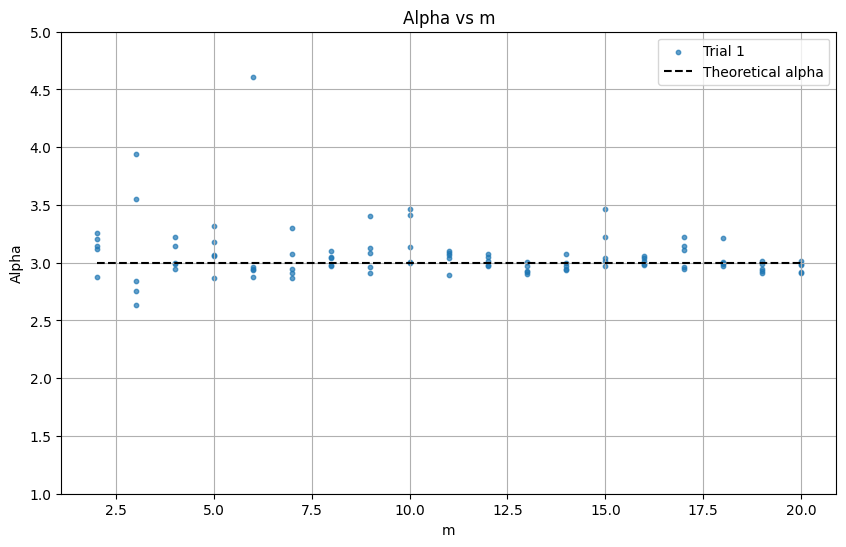

In [49]:
def plot_alpha_vs_m(n, m_min, m_max, num_trials=5):
    m_space = np.arange(m_min, m_max + 1)

    plt.figure(figsize=(10, 6))

    for trial in range(num_trials):
        alpha, k_min = estimatePowerLaw(n, m_min, m_max)
        plt.scatter(m_space, alpha, alpha=0.7, c='tab:blue', s=10, label=f'Trial {trial+1}' if trial == 0 else "")

    # Theoretical alpha line
    plt.plot([m_min, m_max], [3, 3], 'k--', label='Theoretical alpha')

    plt.ylim((1, 5))
    plt.xlabel('m')
    plt.ylabel('Alpha')
    plt.title('Alpha vs m')
    plt.grid(True)
    plt.legend()
    plt.show()

n, m_min, m_max = 500, 2, 20
plot_alpha_vs_m(n, m_min, m_max)

Bạn có nhận xét gì?

YOUR ANSWER HERE

## Task 03: Hệ số gom cụm trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá hệ số gom cụm trung bình trong mô hình Barabási–Albert. Bạn sẽ hoàn thành hàm `generateClusteringCoef` mà nhận đầu vào là mảng np.array là danh sách của `n` giá trị cho mỗi đồ thị và tham số `m`. Hàm này sinh ra các đồ thị Barabási–Albert và trả về mảng np.array của các hệ số gom cụm trung bình.


In [50]:
def generateClusteringCoef(n_list, m):
    # YOUR CODE HERE
    clustering_coefs = []
    for n in n_list:
      G = nx.barabasi_albert_graph(n, m)
      clustering_coef = nx.average_clustering(G)
      clustering_coefs.append(clustering_coef)
    return np.array(clustering_coefs)

In [51]:
# Test
n_list = np.arange(100, 3100, 100)
m = 6
coeffs = generateClusteringCoef(n_list, m)
assert coeffs.shape == (30,), f"Expected shape (30,), but got {coeffs.shape}"
X = np.log(n_list)
X = np.stack([np.ones_like(X), X], axis=1)
Y = np.log(coeffs)[:, None]
slope = (np.linalg.pinv(X) @ Y)[1][0]
assert -0.78 < slope < - \
    0.63, f"Expected slope to be between -0.78 and -0.63, but got {slope}"

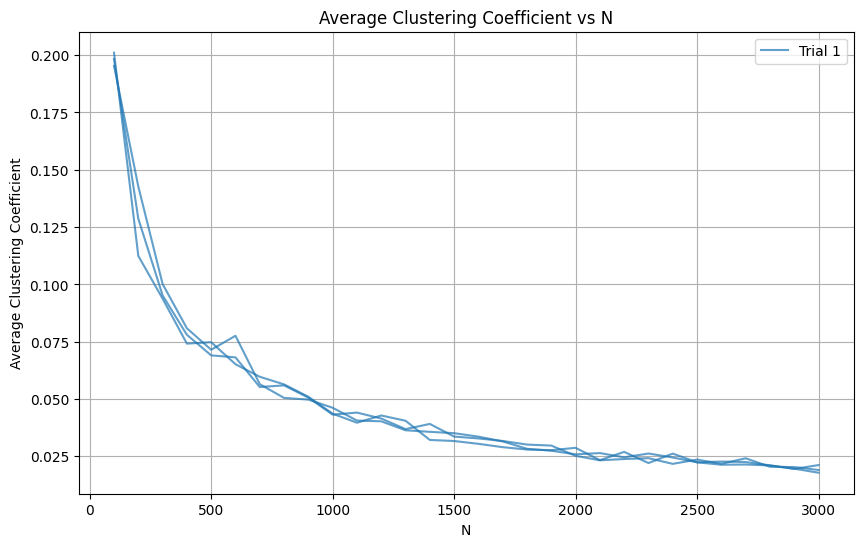

In [52]:
def plotClusteringCoefficients(n_list, m, num_trials=3):
    plt.figure(figsize=(10, 6))

    for trial in range(num_trials):
        coeffs = generateClusteringCoef(n_list, m)
        plt.plot(n_list, coeffs, c='tab:blue', alpha=0.7, label=f'Trial {trial+1}' if trial == 0 else "")

    plt.xlabel('N')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Average Clustering Coefficient vs N')
    plt.legend()
    plt.grid(True)
    plt.show()

n_list = np.arange(100, 3100, 100)
m = 6
plotClusteringCoefficients(n_list, m)

Bạn có nhận xét gì?

YOUR ANSWER HERE

## Task 04: Bậc động lực trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá bậc động lực trong mô hình Barabási–Albert. Khái niệm này đánh giá về một trong các đỉnh khởi tạo và một trong các đỉnh được thêm vào mạng tại một thời điểm hiện tại của bước chuyển định (bước của thuật toán).

Bạn sẽ hoàn thành một hàm `generateDegreeDynamics` mà nhận đầu vào là một mảng np.array với các đỉnh được xem xét, hàm này sinh ra đồ thị Barabási–Albert ($n=3000$, $m=6$) và trả về một mảng np.array với kích thước `(29, len(nodes))` chỉ bậc của những đỉnh này tại thời điểm 100, 200, 300, ..., 2900. Nếu đỉnh chưa tồn tại, gán nó với giá trị `np.nan`.

_Gợi ý: sử dụng hàm `nx.barabasi_albert_graph`_


In [62]:
def generateDegreeDynamics(cons_nodes: np.ndarray) -> np.ndarray:
    # YOUR CODE HERE
    all_degrees = []
    for n in range(100, 3000, 100):
        g = nx.barabasi_albert_graph(n + 1, 6)
        degrees_of_cons_nodes = [
            g.degree[node] if node in g.nodes() else np.nan
            for node in cons_nodes
        ]
        all_degrees.append(degrees_of_cons_nodes)
    return np.array(all_degrees)

In [63]:
# Test
degree_dynamics = generateDegreeDynamics([0, 100, 700, 2000])
assert degree_dynamics.shape == (29, 4), f"Expected shape (29, 4), but got {degree_dynamics.shape}"
assert np.all(np.isnan(degree_dynamics[0]) == [False, False, True, True]), \
    f"Expected NaN mask [False, False, True, True] at row 0, but got {np.isnan(degree_dynamics[0])}"
assert np.all(np.isnan(degree_dynamics[9]) == [False, False, False, True]), \
    f"Expected NaN mask [False, False, False, True] at row 9, but got {np.isnan(degree_dynamics[9])}"
assert degree_dynamics[0, 0] < degree_dynamics[-1, 0], \
    f"Expected degree_dynamics[0, 0] < degree_dynamics[-1, 0], but got {degree_dynamics[0, 0]} >= {degree_dynamics[-1, 0]}"
assert degree_dynamics[0, 1] < degree_dynamics[-1, 1], \
    f"Expected degree_dynamics[0, 1] < degree_dynamics[-1, 1], but got {degree_dynamics[0, 1]} >= {degree_dynamics[-1, 1]}"
assert degree_dynamics[-1, 0] > degree_dynamics[-1, 3], \
    f"Expected degree_dynamics[-1, 0] > degree_dynamics[-1, 3], but got {degree_dynamics[-1, 0]} <= {degree_dynamics[-1, 3]}"

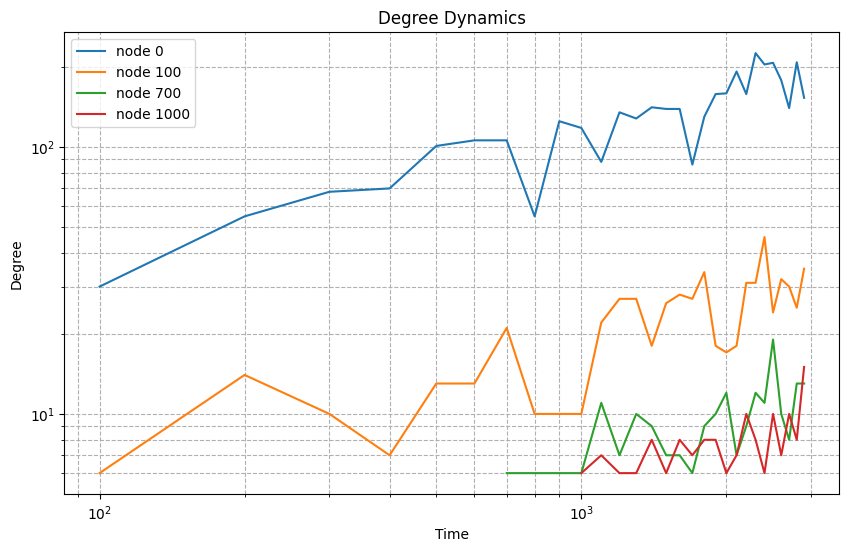

In [64]:
def plotDegreeDynamics():
    timesteps = [0, 100, 700, 1000]
    degree_dynamics = generateDegreeDynamics(timesteps)

    plt.figure(figsize=(10, 6))

    time_space = np.tile(np.arange(100, 3000, 100), (len(timesteps), 1)).T

    for i in range(len(timesteps)):
        plt.plot(time_space[:, i], degree_dynamics[:, i],
                 label=f'node {timesteps[i]}')

    plt.legend()
    plt.title('Degree Dynamics')
    plt.xlabel('Time')
    plt.ylabel('Degree')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")

    plt.show()


plotDegreeDynamics()

Bạn có nhận xét gì?

YOUR ANSWER HERE